In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features: ', features[0], '\nlabel: ', labels[0])

features:  tensor([ 0.9598, -0.6888]) 
label:  tensor([8.4705])


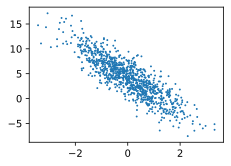

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].numpy(),
                labels.numpy(), 1)

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.4701,  0.1922],
        [ 0.6404, -0.0359],
        [ 1.6226,  1.1825],
        [ 0.0448, -0.6486],
        [-0.1088, -0.3940],
        [ 0.4509, -1.0747],
        [-1.7676,  1.3102],
        [ 0.9583, -0.6372],
        [ 1.1233,  1.3313],
        [ 0.9598, -0.6888]]) 
 tensor([[ 2.5972],
        [ 5.6093],
        [ 3.4279],
        [ 6.4890],
        [ 5.3214],
        [ 8.7627],
        [-3.7995],
        [ 8.2664],
        [ 1.9322],
        [ 8.4705]])


In [21]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [8]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [9]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [10]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [22]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.031235
epoch 2, loss 0.000110
epoch 3, loss 0.000053
epoch 4, loss 0.000052
epoch 5, loss 0.000052


In [23]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0002, -0.0005], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0006], grad_fn=<RsubBackward1>)
